# Anomalise indices for HydroTas 2020-2021 workplan:
- Skill assessment
  - rainfall, surface temp and surface wind over Australia region and Tasmania region
  - Assess skill as function of start month and ensemble size
- UNSEEN
  - Tasmanian rainfall and Melbourne surface temperature

In [1]:
import glob
import itertools
import xarray as xr
import myfuncs as my

# Parameters

In [2]:
CLIM_PERIOD = slice('1990-01-01', '2019-12-31')
FCST_FILES = glob.glob('data/*[A-Z].zarr*')
OBSV_FILES = glob.glob('data/*[A-Z]_ts.zarr*')

# Anomalise

In [3]:
for file in FCST_FILES:
    ds = my.open_zarr(file).compute()

    clim = my.get_monthly_clim(
        ds.mean('ensemble') if 'ensemble' in ds.dims else ds, 
        'init_date', CLIM_PERIOD)
    anom = my.get_monthly_anom(ds, 'init_date', clim)
    
    my.to_zarr(anom, file.replace('.zarr.zip', '_anom.zarr'))

In [4]:
for file in OBSV_FILES:
    ds = my.open_zarr(file).compute()
    
    clim = my.get_monthly_clim(ds, 'time', CLIM_PERIOD)
    anom = my.get_monthly_anom(ds, 'time', clim)
    
    my.to_zarr(anom, file.replace('.zarr.zip', '_anom.zarr'))

# Check the anomalies

In [5]:
fcst = my.open_zarr('data/f5_t_ref_AUS_anom.zarr.zip')
obsv = my.open_zarr('data/jra55_t_ref_AUS_anom.zarr.zip')

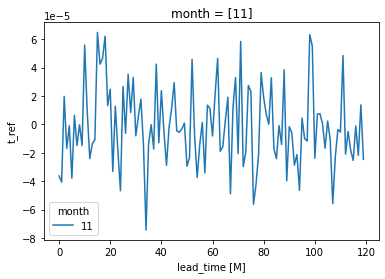

In [6]:
period = eval(fcst.attrs['climatological_period'])
my.get_monthly_clim(
    my.mask_time_period(fcst['t_ref'].mean('ensemble'), period), 
    dim='init_date').plot.line(x='lead_time')

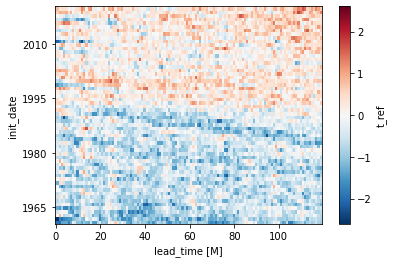

In [7]:
fcst['t_ref'].mean('ensemble').plot()

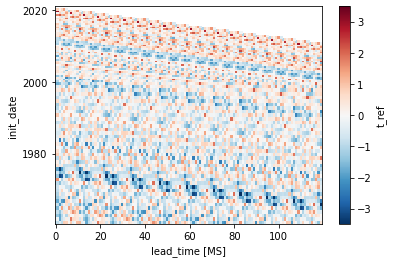

In [8]:
obsv['t_ref'].plot()

In [9]:
obsv = my.open_zarr('data/jra55_t_ref_AUS_ts_anom.zarr.zip')

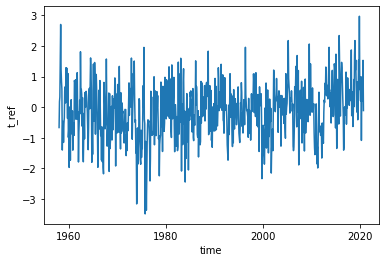

In [10]:
obsv['t_ref'].plot()